Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
x_data의 shape : (20, 150, 150, 3)
t_data의 shape : (20,)
[1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]


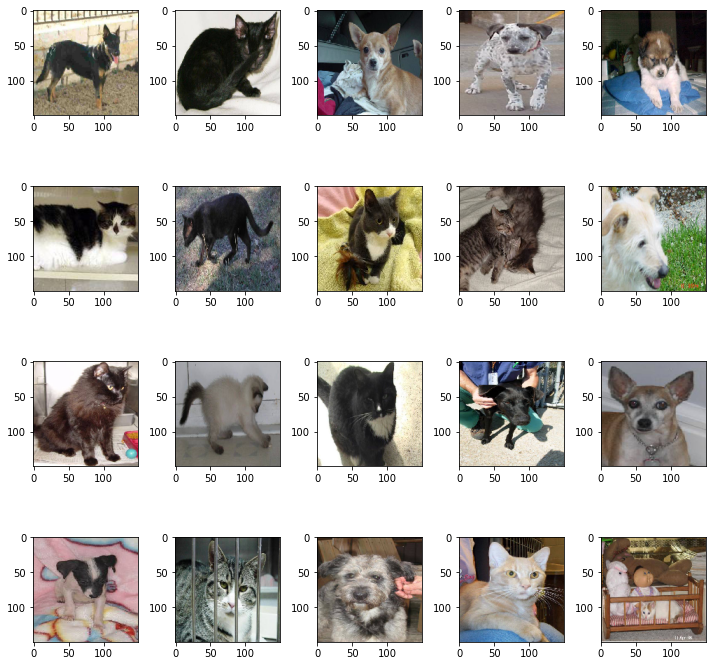

In [4]:
%reset
% matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './data/cat_dog_full/train'   # (dogs, cats 폴더가 안에 있어요!)
validation_dir = './data/cat_dog_full/validation'

# ImageDataGenerator를 생성

# 이미지 데이터의 값을 1/225로 scaling
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# train data를 가져오면 => x_data(독립변수,픽셀데이터), t_data(종속변수,label)
train_generator = train_datagen.flow_from_directory(
    train_dir,                # taget directory : 데이터를 어디에서 가져올건가요!
    classes=['cats', 'dogs'], # label적용을 어떻게 할건가요? 순서대로 레이블이 적용
                              # cats : 0, dogs : 1  (cats와 dogs는 폴더명!!)
                              # 만약 classes를 명시하지 않으면 폴더명 순서로 label이 잡혀요!   
    target_size=(150,150),    # 이미지 size scaling(크기를 150x150으로 변경해서 들고와!!)
    batch_size=20,            # 한번에 20개의 이미지를 가져와!!  
                              # label에 상관없이 가져와요!!
    class_mode='binary'       # 이진분류이기 때문에 'binary'
                              # 만약 MNIST처럼 다중분류면 'categorical'
                              # 기본값은 'categorical'
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,           # taget directory : 데이터를 어디에서 가져올건가요!
    classes=['cats', 'dogs'], # label적용을 어떻게 할건가요? 순서대로 레이블이 적용
                              # cats : 0, dogs : 1  (cats와 dogs는 폴더명!!)
                              # 만약 classes를 명시하지 않으면 폴더명 순서로 label이 잡혀요!   
    target_size=(150,150),    # 이미지 size scaling(크기를 150x150으로 변경해서 들고와!!)
    batch_size=20,            # 한번에 20개의 이미지를 가져와!!  
                              # label에 상관없이 가져와요!!
    class_mode='binary'       # 이진분류이기 때문에 'binary'
                              # 만약 MNIST처럼 다중분류면 'categorical'
                              # 기본값은 'categorical'
    )

# generator로부터 출력된 데이터의 shape을 확인!
for x_data, t_data in train_generator:
    print('x_data의 shape : {}'.format(x_data.shape))  # (20,150,150,3)
    print('t_data의 shape : {}'.format(t_data.shape))  # (20,) 
    break;

    
fig = plt.figure(figsize=(10,10)) 
axs = []   # subplot을 저정하는 리스트

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
    
    # x_data shape : (20,150,150,3)
    for idx, img_data in enumerate(x_data):   # idx => 0~19  img_data => (150,150,3)
        axs[idx].imshow(img_data)
  
    print(t_data)    
    break;
    
fig.tight_layout()    
plt.show()